In [1]:
from matplotlib import pyplot as plt
import seaborn
from math import sqrt, pi
from poisson_disc import Grid
import random
%matplotlib inline

In [2]:
r = 1
length = 20
width = 10
grid = Grid(r, length, width)

In [3]:
rand = (random.uniform(0, length), random.uniform(0, width))
data = grid.poisson(rand)

In [4]:
def unzip(items):
    return ([item[i] for item in items] for i in range(len(items[0])))

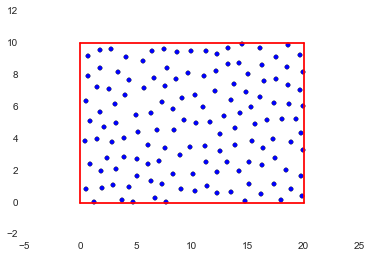

In [5]:
plt.scatter(*unzip(data))
plt.axvline(ymin=2/14, ymax=12/14, color='red')
plt.axvline(x=20, ymin=2/14, ymax=12/14, color='red')
plt.axhline(y=10, xmin=5/30, xmax=25/30, color='red')
plt.axhline(y=0, xmin=5/30, xmax=25/30, color='red')

In [6]:
print("samples: {}".format(len(data)))
print("density (samples/area): {}".format(round(len(data)/(length*width))))

samples: 138
density (samples/area): 1


In [7]:
r = 5
length = 100
width = 80
grid = Grid(r, length, width)

In [8]:
rand = (random.uniform(0, length), random.uniform(0, width))
samples = grid.poisson(rand, 30)

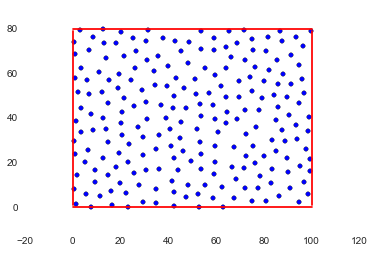

In [9]:
plt.scatter(*unzip(samples))
plt.axvline(x=0, ymin=10/90, ymax=80/90, color='red')
plt.axvline(x=100, ymin=10/90, ymax=80/90, color='red')
plt.axhline(y=80, xmin=20/140, xmax=120/140, color='red')
plt.axhline(y=0, xmin=20/140, xmax=120/140, color='red')

In [10]:
print("samples: {}".format(len(samples)))
print("density: {}".format(round(len(samples)/(length*width), 2)))
print("Rough density bounds:")
print(round(length*width/(pi*(2*r)**2), 2))
print(round(length*width/(pi*r**2), 2))

samples: 219
density: 0.03
Rough density bounds:
25.46
101.86


In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
r=.5
length = 3
width = 3
height = 3
grid = Grid(r, length, width, height)

In [13]:
rand = (random.uniform(0, length), random.uniform(0, width), random.uniform(0, height))
data = grid.poisson(rand, 30)

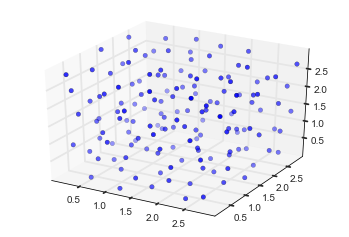

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*unzip(data))
ax.margins(0,0,0)

In [15]:
def distances(data, r):
    points = {frozenset([item1, item2]) for item1 in data for item2 in data if item1 != item2}
    return [sqrt(grid.distance(*item)) for item in points if grid.distance(*item) < r**2]
# Note here that the grid.distance function actually
# returns the squared distance between points

In [16]:
print(distances(data,r))

[]


In [17]:
print("samples: {}".format(len(data)))
print("density: {}".format(round(len(data)/(length*width*height), 2)))

samples: 153
density: 5.67


In [18]:
print("Very rough density bounds:")
print(round((3*length*width*height)/(4*pi*(2*r)**3), 2))
print(round((3*length*width*height)/(4*pi*r**3), 2))

Very rough density bounds:
6.45
51.57
